# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**The goal is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---


## Part One: Understanding the Background and Data


**Related article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Exploring the DataFrame**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Relationship between popularity of a film and its rating**

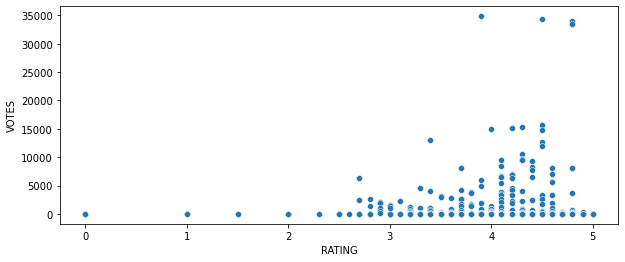

In [6]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango, x="RATING", y="VOTES");

**Correlation between the features**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Extracting year from the movie title**

In [8]:
fandango["YEAR"] = fandango.FILM.str.split("(").str[-1].str[:-1]

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**How many movies per year does Fandango publish stars on**

In [10]:
fandango.YEAR.value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

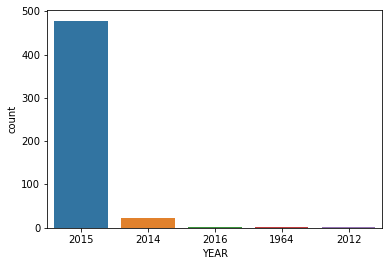

In [11]:
sns.countplot(data=fandango, x="YEAR");

**10 movies with the highest number of votes**

In [12]:
fandango.sort_values("VOTES",ascending=False).loc[:9]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Movies with zero votes**

In [13]:
fandango[fandango.VOTES==0].VOTES.count()

69

**Creating DataFrame of only reviewed films by removing any films that have zero votes.**

In [14]:
fandango = fandango[fandango.VOTES>0]

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

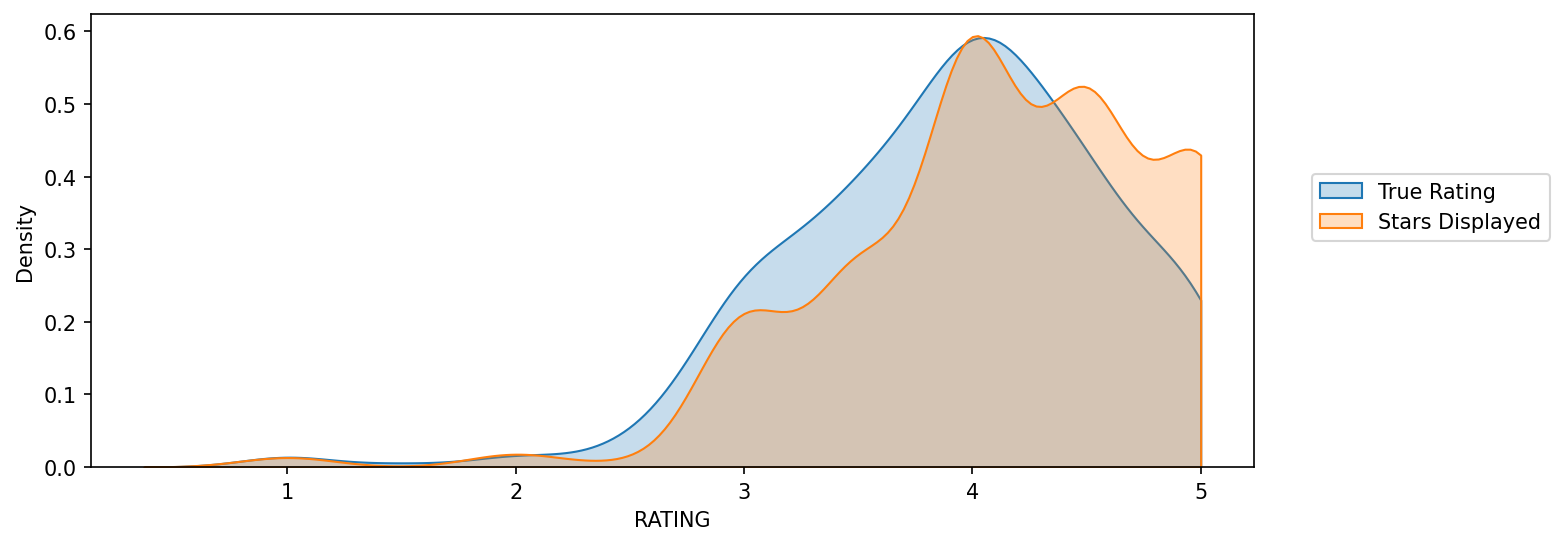

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

**Quantifying the discrepency, calculating the difference between STARS displayed and the RATING**

In [16]:
fandango["STARS_DIFF"] = np.round(fandango.STARS-fandango.RATING,1)

In [17]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Counting the STARS_DIFF**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

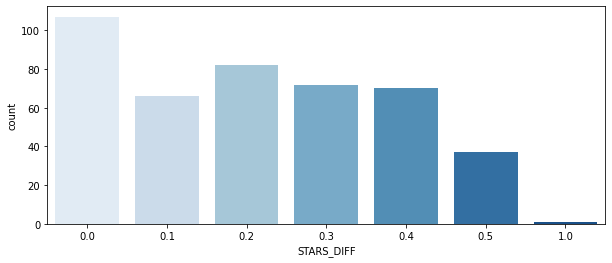

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data=fandango, x="STARS_DIFF", palette ="Blues")

## Part Three: Comparison of Fandango Ratings to Other Sites

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Exploring all sites dataframe**

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

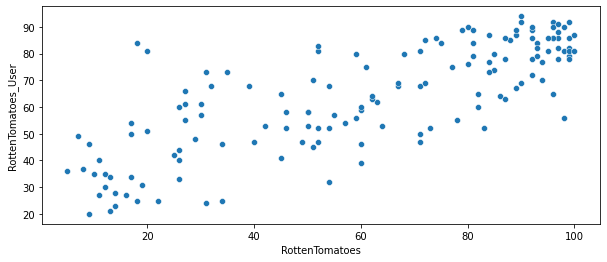

In [23]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [24]:
all_sites["Rotten_Diff"] = np.round(all_sites.RottenTomatoes - all_sites.RottenTomatoes_User,1)

**Mean absolute difference between RT scores and RT User scores**

In [25]:
abs(all_sites.RottenTomatoes-all_sites.RottenTomatoes_User).mean()

15.095890410958905

**The distribution of the differences between RT Critics Score and RT User Score.**

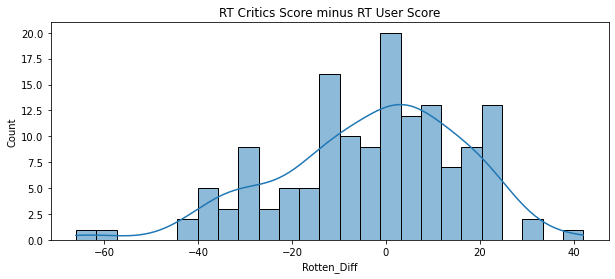

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites, x="Rotten_Diff",kde=True, bins=25)
plt.title("RT Critics Score minus RT User Score");

**Distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.**

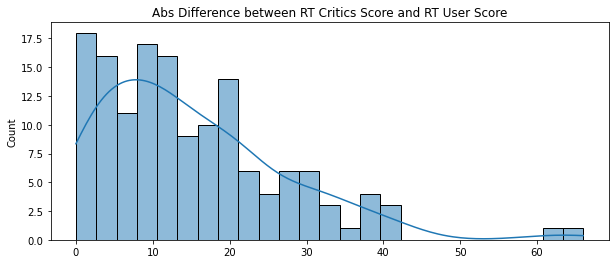

In [27]:
plt.figure(figsize=(10,4))
sns.histplot(abs(all_sites.RottenTomatoes-all_sites.RottenTomatoes_User), kde=True, bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score");

**Which movies are causing the largest differences. The top 5 movies with the largest negative difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**Top 5 movies users rated higher than critics on average:**

In [28]:
all_sites.sort_values("Rotten_Diff").iloc[:5][["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average.**

In [29]:
all_sites.sort_values("Rotten_Diff").iloc[-5:][["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
37,Welcome to Me (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24
115,While We're Young (2015),31
112,It Follows (2015),31
69,Mr. Turner (2014),42


## MetaCritic


**Scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

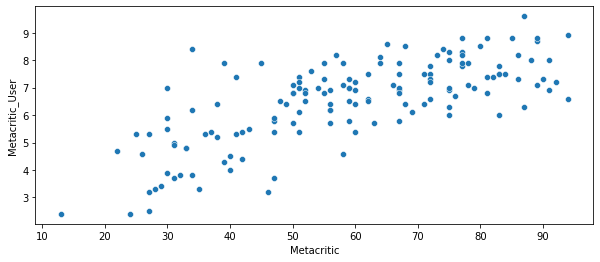

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x="Metacritic", y="Metacritic_User")

## IMDB

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

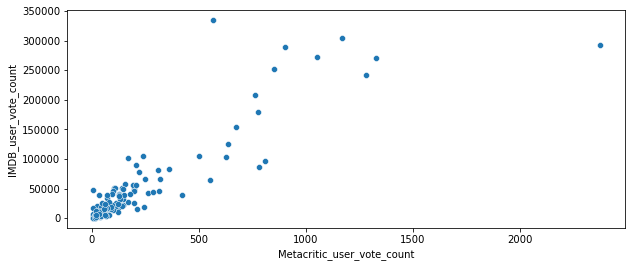

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x="Metacritic_user_vote_count", y="IMDB_user_vote_count")

**Movie with highest IMDB user vote count**

In [32]:
all_sites[all_sites.IMDB_user_vote_count == all_sites["IMDB_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie with Metacritic User Vote count**

In [33]:
all_sites[all_sites.Metacritic_user_vote_count == all_sites.Metacritic_user_vote_count.max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

**Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. Comapring movies that are in both DataFrames, so doing an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [34]:
movies = pd.merge(fandango, all_sites, on="FILM")
movies.drop("STARS_DIFF", axis=1, inplace=True)

In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [36]:
movies.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [37]:
def normalize_10(val) :
    return round(val/2,1)
def normalize_100(val) :
    return round(val/20,1)

In [42]:
movies["RT_Norm"] = movies.RottenTomatoes.apply(lambda x : normalize_100(x))
movies["RT_U_Norm"] = movies.RottenTomatoes_User.apply(lambda x : normalize_100(x))
movies["Meta_Norm"] = movies.Metacritic.apply(lambda x : normalize_100(x))
movies["Meta_U_Norm"] = movies.Metacritic_User.apply(lambda x : normalize_10(x))
movies["IMDB_Norm"] = movies.IMDB.apply(lambda x : normalize_10(x))

In [43]:
movies.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.5,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.5,4.3


In [45]:
movies_norm = movies[["STARS", "RATING", "RT_Norm", "RT_U_Norm", "Meta_Norm", "Meta_U_Norm", "IMDB_Norm"]]

In [46]:
movies_norm.head()

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.5,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.5,4.3


### Comparing Distribution of Scores Across Sites
Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

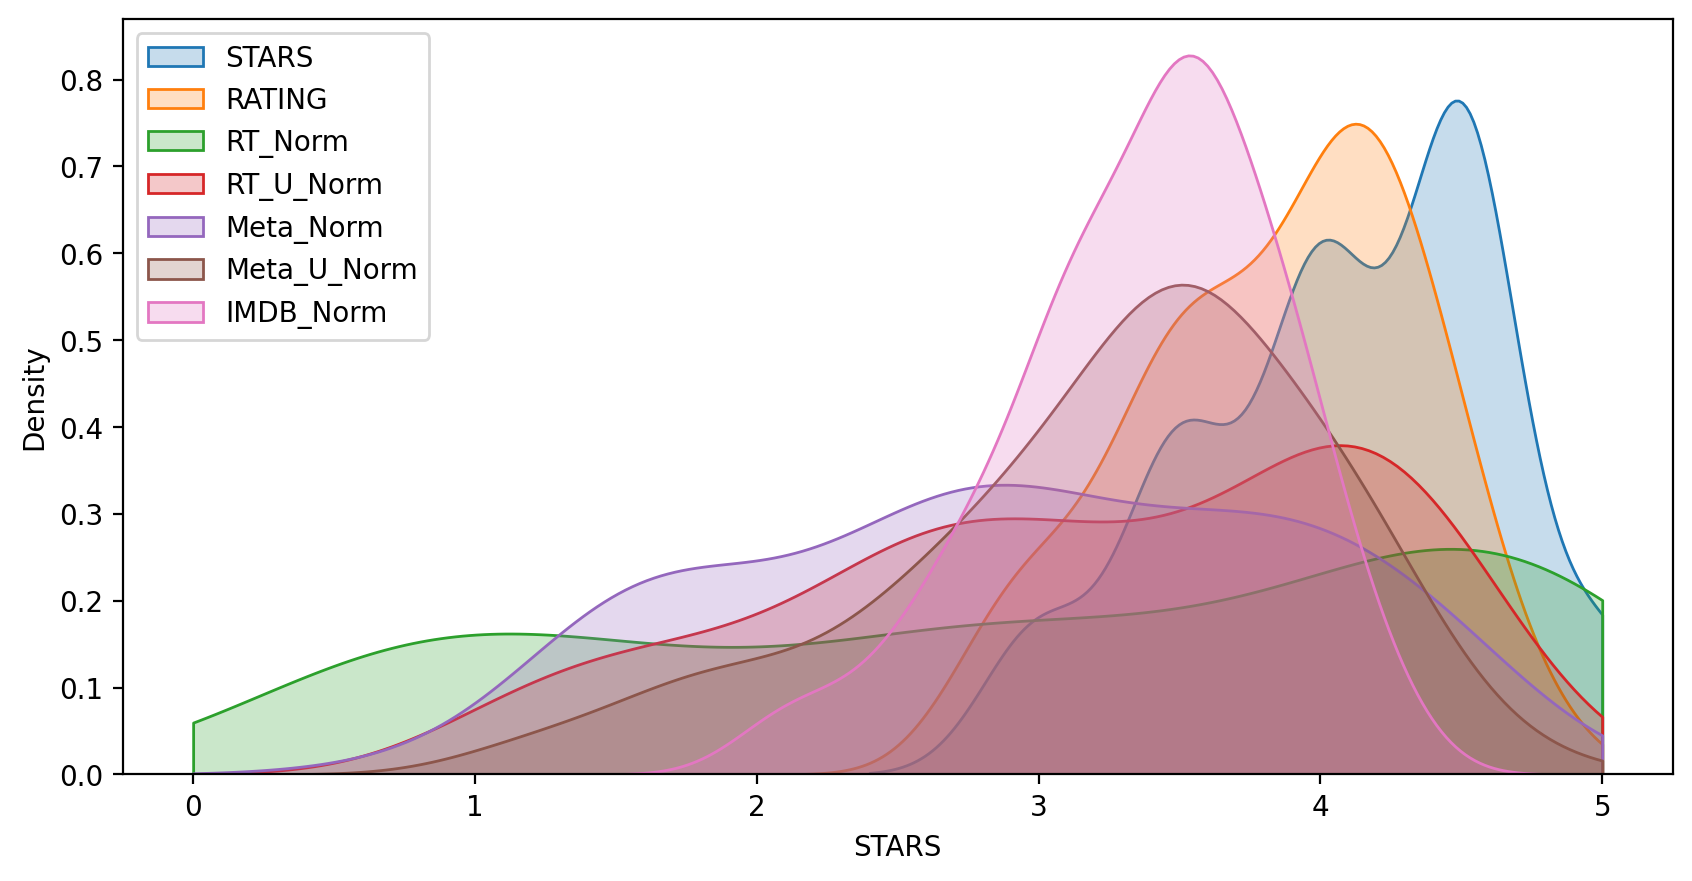

In [59]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=movies_norm,x='STARS',clip=[0,5],fill=True,label='STARS')
sns.kdeplot(data=movies_norm,x='RATING',clip=[0,5],fill=True,label='RATING')
sns.kdeplot(data=movies_norm,x='RT_Norm',clip=[0,5],fill=True,label='RT_Norm')
sns.kdeplot(data=movies_norm,x='RT_U_Norm',clip=[0,5],fill=True,label='RT_U_Norm')
sns.kdeplot(data=movies_norm,x='Meta_Norm',clip=[0,5],fill=True,label='Meta_Norm')
sns.kdeplot(data=movies_norm,x='Meta_U_Norm',clip=[0,5],fill=True,label='Meta_U_Norm')
sns.kdeplot(data=movies_norm,x='IMDB_Norm',clip=[0,5],fill=True,label='IMDB_Norm')
plt.legend(loc="upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

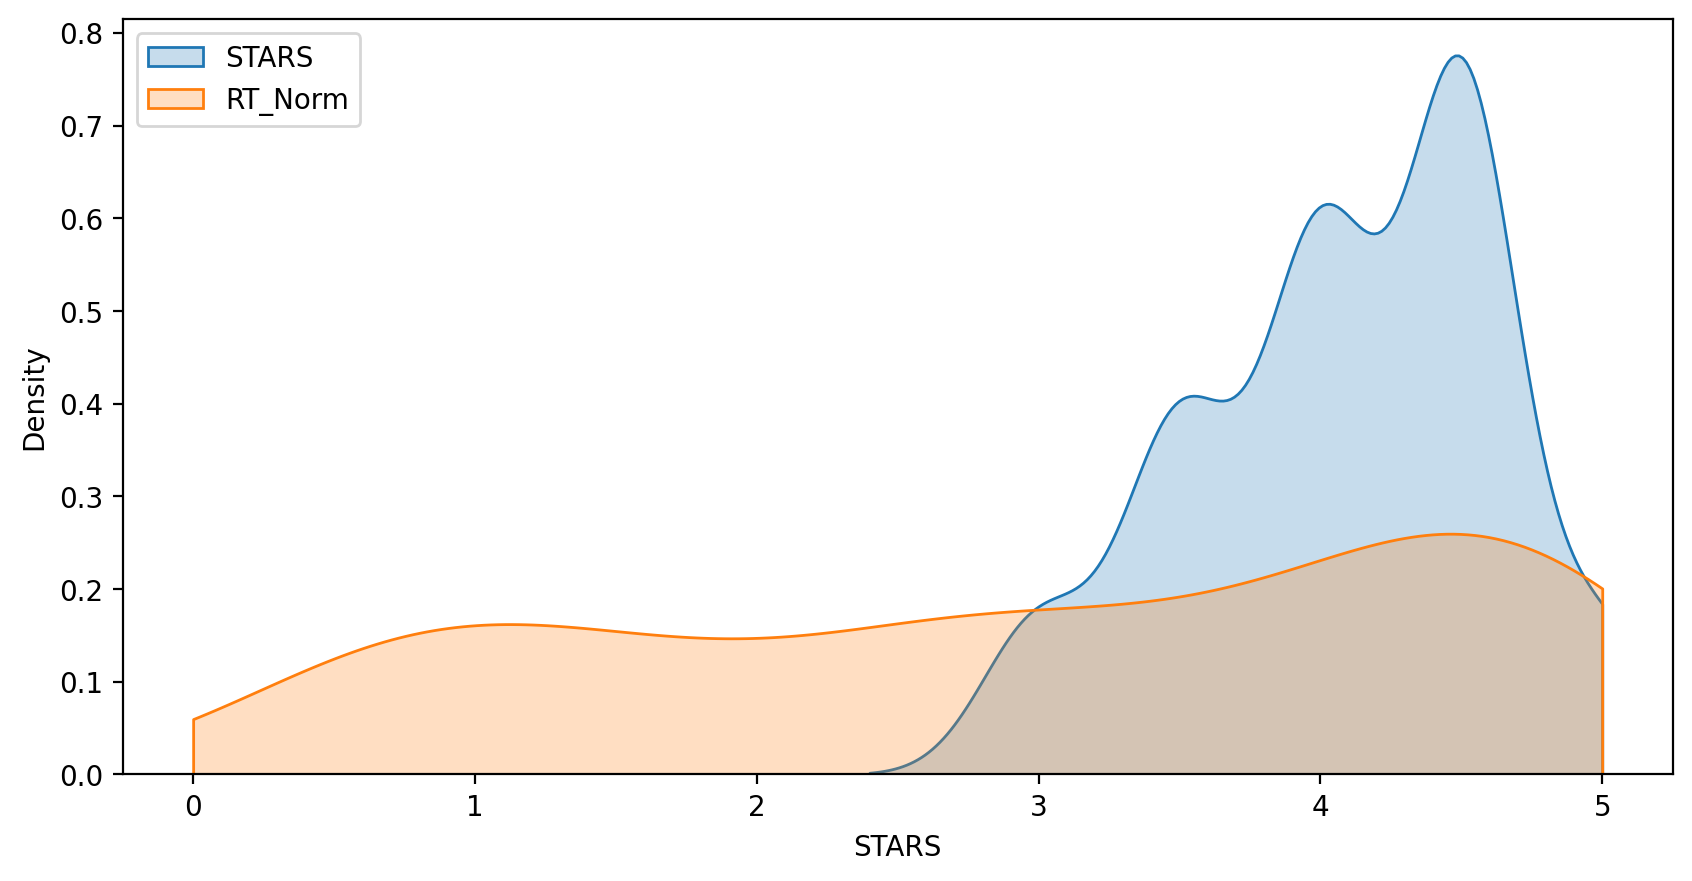

In [60]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=movies_norm,x='STARS',clip=[0,5],fill=True,label='STARS')
sns.kdeplot(data=movies_norm,x='RT_Norm',clip=[0,5],fill=True,label='RT_Norm')
plt.legend(loc="upper left")